# Credit Score Clasification

#### Importamos los datos

datos de https://www.kaggle.com/datasets/parisrohan/credit-score-classification

ID: Representa una identificación única de una entrada.

Customer_ID: Representa una identificación única de una persona.

Month: Representa el mes del año.

Name: Representa el nombre de la persona

Age: Representa la edad de la persona

SSN: Representa el número de seguro social de una persona.

Occupation: Representa la ocupación de la persona.

Annual_Income: Representa el ingreso anual de la persona.

Monthly_Inhand_Salary: Representa el salario base mensual de una persona.

Num_Bank_Accounts: Representa el número de cuentas bancarias que posee una persona.

Num_Credit_Card:Representa el número de otras tarjetas de crédito que posee una persona.

Interest_Rate: Representa la tasa de interés de la tarjeta de crédito.

Num_of_Loan: Representa el número de préstamos tomados del banco.

Type_of_Loan: Representa los tipos de préstamo tomados por una persona.

Delay_from_due_date: Representa el promedio de días de retraso desde la fecha de pago.

Num_of_Delayed_Payment: Representa el número promedio de pagos retrasados por una persona

Changed_Credit_Limit: Representa el cambio porcentual en el límite de la tarjeta de crédito.

Num_Credit_Inquiries: Representa el número de consultas de tarjetas de crédito.

Credit_Mix: Representa la clasificación del mix de créditos.

Outstanding_Debt: Representa la deuda restante por pagar (en USD).

Credit_Utilization_Ratio: Representa el índice de utilización de la tarjeta de crédito.

Credit_History_Age: Representa la antigüedad del historial crediticio de la persona.

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person.

Total_EMI_per_month: Representa los pagos mensuales de EMI (en USD).

Amount_invested_monthly: Representa el monto mensual invertido por el cliente (en USD).

Payment_Behaviour: Representa el comportamiento de pago del cliente (en USD).

Monthly_Balance: Representa el saldo mensual del cliente (en USD).

Credit_Score: Representa el puntaje del crédito.

In [10]:
import numpy as np

def patch_asscalar(a):
    return a.item()

setattr(np, "asscalar", patch_asscalar)
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [11]:
import pandas as pd
df = pd.read_csv("Credit score classification.csv")

C:\Users\herie\AppData\Local\Temp\ipykernel_12172\2514519756.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Credit score classification.csv")


#### Limpiamos los datos

In [ ]:
df.head(5)

Elegimos las columnas con las caracerísticas relevantes.

In [ ]:
df.columns

In [12]:
feature_names = ["Age", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Delay_from_due_date", 
                 "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]

Vemos el tipo de los datos

In [ ]:
print(df[feature_names].dtypes)

Los hacemos numéricos

In [13]:
df[feature_names] = df[feature_names].apply(pd.to_numeric, errors='coerce')
print(df[feature_names].dtypes)

Age                        float64
Monthly_Inhand_Salary      float64
Num_Bank_Accounts            int64
Delay_from_due_date          int64
Changed_Credit_Limit       float64
Outstanding_Debt           float64
Amount_invested_monthly    float64
Monthly_Balance            float64
dtype: object


Vemos el tipo de los Credit_Score

In [ ]:
print(df['Credit_Score'].unique())

Les cambiamos el nombre para que sea más fácil leer

In [14]:
df['Credit_Score'] = df['Credit_Score'].replace({'Good': 'G', 'Standard': '-', 'Poor': 'P'})
print(df['Credit_Score'].unique())

['G' '-' 'P']


In [ ]:
df = df.dropna()
df[feature_names].describe()

Limpiamos los datos, por ejemplo, hay edades de -500 hasta 8698

In [15]:
df = df[(df['Age'] >= 20) & (df['Age'] <= 90)]
df = df[df['Num_Bank_Accounts'] >= 0]
df = df[df['Num_Bank_Accounts'] < 20]
df = df[df['Num_Credit_Card'] < 2000]

df[feature_names].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
count,80887.000000,68774.000000,80887.000000,80887.000000,79192.000000,80064.000000,73767.000000,79929.000000
mean,35.374671,4269.821993,5.266644,20.432690,10.149298,1371.927796,198.496269,408.495786
std,9.610742,3221.205147,2.600874,14.590042,6.726155,1130.033401,202.285027,216.871951
min,20.000000,303.645417,0.000000,-5.000000,-6.480000,0.230000,0.000000,0.007760
25%,27.000000,1651.931667,3.000000,10.000000,5.080000,544.140000,73.169459,272.577941
50%,35.000000,3141.942500,5.000000,17.000000,9.180000,1113.980000,130.468646,341.242326
75%,43.000000,6093.610000,7.000000,27.000000,14.310000,1801.790000,240.787260,479.275989
max,56.000000,15204.633333,18.000000,67.000000,36.970000,4998.070000,1977.326102,1602.040519


Estandarizamos

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[feature_names] = scaler.fit_transform(df[feature_names])

df[feature_names].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
count,8.088700e+04,6.877400e+04,8.088700e+04,8.088700e+04,7.919200e+04,8.006400e+04,7.376700e+04,7.992900e+04
mean,-8.784387e-17,2.330800e-16,-1.085750e-16,8.538424e-17,-3.858134e-17,8.235707e-17,1.756924e-16,-1.621476e-16
std,1.000006e+00,1.000007e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000007e+00,1.000006e+00
min,-1.599748e+00,-1.231280e+00,-2.024964e+00,-1.743165e+00,-2.472349e+00,-1.213864e+00,-9.812769e-01,-1.883557e+00
25%,-8.713919e-01,-8.127112e-01,-8.714984e-01,-7.150599e-01,-7.536742e-01,-7.325385e-01,-6.195597e-01,-6.267233e-01
50%,-3.898483e-02,-3.501446e-01,-1.025214e-01,-2.352777e-01,-1.441097e-01,-2.282671e-01,-3.362982e-01,-3.101087e-01
75%,7.934222e-01,5.661860e-01,6.664556e-01,4.501255e-01,6.185894e-01,3.804002e-01,2.090678e-01,3.263707e-01
max,2.146084e+00,3.394658e+00,4.895829e+00,3.191738e+00,3.987549e+00,3.208901e+00,8.793740e+00,5.503488e+00


Las cosas negativas, las invertimos

In [1]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'] * -1
df['Delay_from_due_date'] = df['Delay_from_due_date'] * -1
df['Outstanding_Debt'] = df['Outstanding_Debt'] * -1

df[feature_names].describe()

NameError: name 'df' is not defined

In [ ]:
df[feature_names].describe()

# Visualizar datos

Visualizamos los datos

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os

# if not os.path.exists('Distributions'):
#     os.makedirs('Distributions')

# df_sample = df.sample(100, random_state=42)

# for feature in feature_names:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df_sample[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
#     plt.savefig(f'Distributions/{feature}_distribution.png')

In [ ]:
print(df.columns)

[ 1  0 -1]


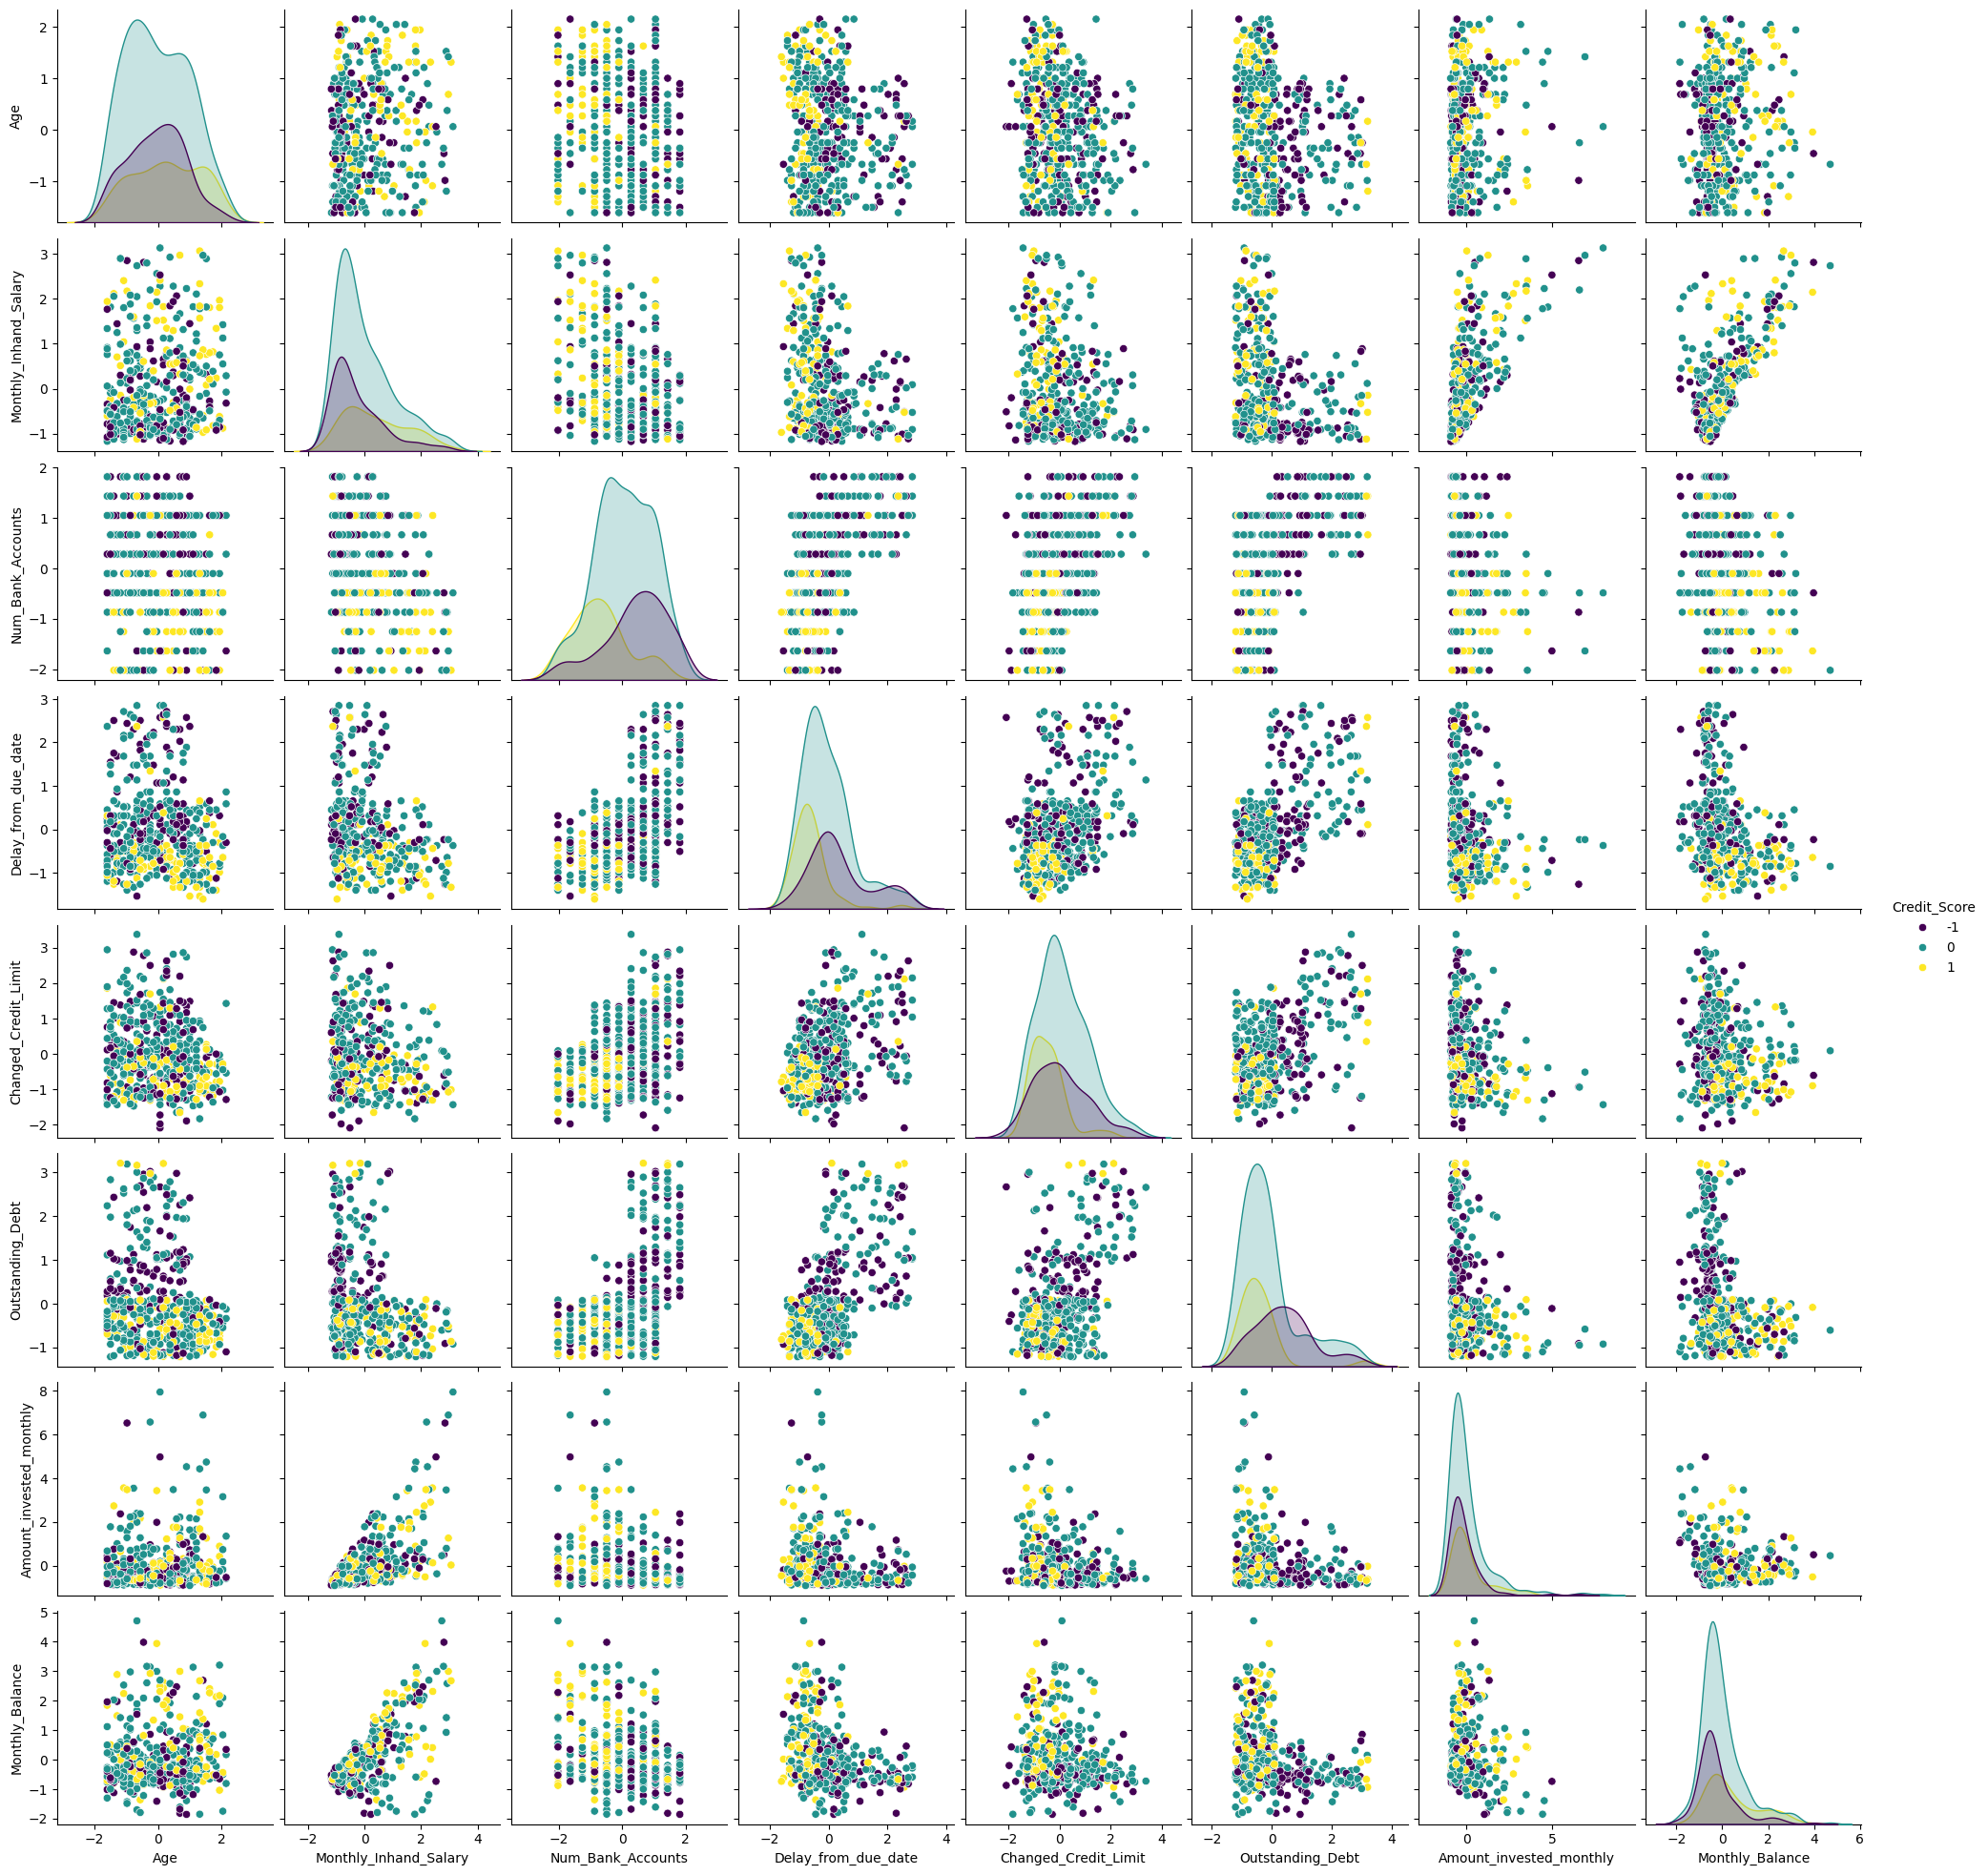

In [18]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

if not os.path.exists('Pairplot'):
    os.makedirs('Pairplot')

feature_names = ["Age", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Delay_from_due_date", 
                 "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance", "Credit_Score"]


df['Credit_Score'] = df['Credit_Score'].replace({'G': 1, '-': 0, 'P': -1})
print(df['Credit_Score'].unique())

n=500
pairplot = sns.pairplot(df.sample(n)[feature_names], hue = 'Credit_Score', palette= 'viridis')
plt.savefig(f'Pairplot/pairplot{n}.png')

In [ ]:
df['Credit_Score'].value_counts()

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as py
import os

def create_3d_scatter(x_col, y_col, z_col):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=3,
            color=df[z_col],
            colorscale='Viridis',   
            opacity=0.5
        )
    )])

    title = f'{x_col}, {y_col}, {z_col}'
    fig.update_layout(
        title=title,
        scene = dict(
            xaxis = dict(title = x_col, showbackground=False),
            yaxis = dict(title = y_col,showbackground=False),
            zaxis = dict(title = z_col,showbackground=False),
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    current_dir = os.getcwd()
    subfolder = '3D Scatter plot'
    filename = os.path.join(current_dir, subfolder, title.replace(' ', '_') + '.html')
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    py.write_html(fig, filename)

    fig.show()

In [ ]:
create_3d_scatter('Age', 'Monthly_Inhand_Salary', 'Outstanding_Debt')

Los puntos mas negativos son, personas de edad corta, que deben mucho, tienen poco salario base mensual :c y viceversa

In [ ]:
create_3d_scatter('Outstanding_Debt', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit')

# Ejemplo

In [ ]:
eg = [c for c in df.columns if c in ['Num_Bank_Accounts', 'Delay_from_due_date', 'Outstanding_Debt']]

In [ ]:
create_3d_scatter(eg[0], eg[1], eg[2])

In [ ]:
X2 = np.array(df[eg])
y = np.array(df["Credit_Score"])

In [ ]:
mapper = km.KeplerMapper(verbose=0)

#### DBSCAN

In [ ]:
eps = 1
min_samples = 10
n_cubes = 10
perc_overlap = 0.2

lens = mapper.fit_transform(X2)

graph = mapper.map(
    lens,
    X2,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Eg/DBSCAN'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=y,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

#### K Mens

In [ ]:
lens = mapper.fit_transform(X2)

n_clusters = 3
n_cubes = 18
perc_overlap = .1

graph = mapper.map(
    lens,
    X2,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Eg/K Means'
filename = os.path.join(current_dir, subfolder, f"n_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=y,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

# Mapper

In [ ]:
X = np.array(df[feature_names])
y = np.array(df["Credit_Score"])

In [ ]:
mapper = km.KeplerMapper(verbose=0)

#### DBSCAN

In [ ]:
eps = 1
min_samples = 10
n_cubes = 10
perc_overlap = 0.2

lens = mapper.fit_transform(X)

graph = mapper.map(
    lens,
    X,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Credit Score Classification/DBSCAN'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=y,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

#### K Means

In [ ]:
lens = mapper.fit_transform(X)

n_clusters = 3
n_cubes = 40
perc_overlap = .1

graph = mapper.map(
    lens,
    X,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Credit Score Classification/K Means'
filename = os.path.join(current_dir, subfolder, f"n_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=y,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

#### Kernel Density

In [ ]:
from sklearn.neighbors import KernelDensity
import os

eps = 3
min_samples = 150
n_cubes = 4
perc_overlap = 0.05
bandwidth = 0.8

mapper=km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(X, projection=KernelDensity(kernel='gaussian',bandwidth=bandwidth))

graph = mapper.map(
    lens,
    X,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Credit Score Classification/Kenel Density'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}, bandwidth{bandwidth}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=y,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}")